# Support Vector Machine (SVM) and Kernel Functions

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#import SVM model
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split

#### Frist, We will create a non-linearly seperable dataset.

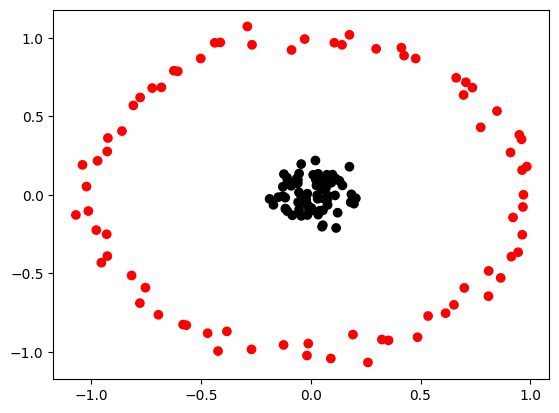

In [31]:
from sklearn.datasets import make_circles
X, y = make_circles(150, factor=0.1, noise=0.05)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='flag')
plt.show()

## <span style="color:crimson">Classify using the Linear Kernel</span>

In [32]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

def plot_decision_boundary(X,y,classifier):
    fig, ax = plt.subplots()
    xx, yy = make_meshgrid(X[:, 0], X[:, 1])
    plot_contours(ax, classifier, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_ylabel('y')
    ax.set_xlabel('x')
    ax.set_xticks(())
    ax.set_yticks(())
    plt.show()

In [33]:
# train the model
model = SVC(kernel='linear')
linear_clf = model.fit(X, y)

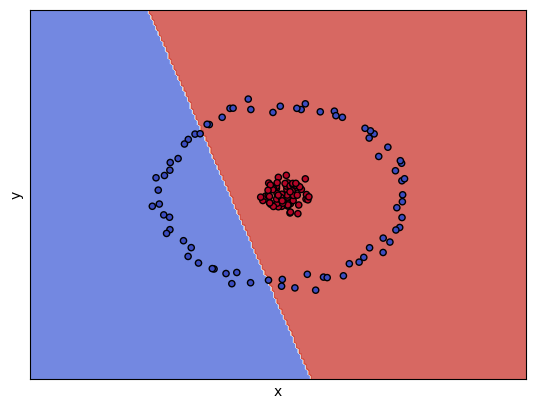

In [34]:
# using linear kernel
plot_decision_boundary(X,y,linear_clf)

In [35]:
# split the data
# test random state
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.20)

In [36]:
# train and predict using a linear classifier
linear_clf = SVC(kernel='linear')
linear_clf.fit(xtrain, ytrain)
ypred=linear_clf.predict(xtest)

In [37]:
# check model performance
from sklearn.metrics import accuracy_score
accuracy_score(ypred, ytest)

0.6666666666666666

**We get an Accuracy of 60%**

Obviously a linear classifier will not fit a non-linear data. So it's not classifying the data points correctly as expected. The red datapoints are identified along with black since the data is non-linear.

## <span style="color:crimson">Classify using the Radial Basis Function (RBF) Kernel</span>

In [41]:
# train the model
# experiment with different values of 'gamma' and it's effect on the decision boundary.
model = SVC(kernel='rbf',gamma=0.05)
rbf_clf = model.fit(X, y)

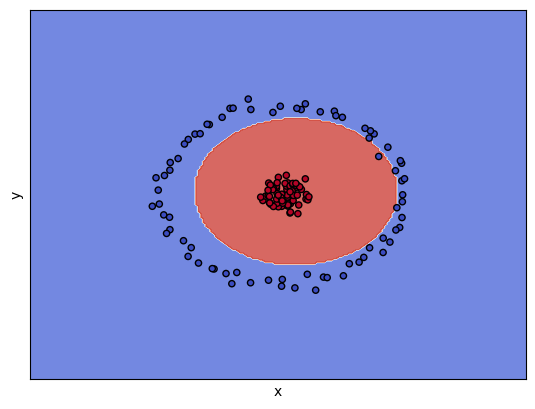

In [42]:
# using rbf kernel
plot_decision_boundary(X,y,rbf_clf)

Here the decision boundary is perfectly seperating both the classes.

In [ ]:
# train and predict using a RBF Kernel classifier
rbf_clf = SVC(kernel='rbf')
rbf_clf.fit(xtrain, ytrain)
ypred=rbf_clf.predict(xtest)

In [ ]:
# check model performance
from sklearn.metrics import accuracy_score
accuracy_score(ypred, ytest)

1.0

**We get an Accuracy of 100%**

## What is Happening Internally?

To tarnsform the two dimensional data to three dimensional, we need the z co-ordinates. To do this, we will use the Radial Basis Function e<sup>-x</sup><sup><sup>2</sup></sup> to create the z co-ordinates.

Use https://www.desmos.com/calculator and type y = e<sup>-x</sup><sup><sup>2</sup></sup> to visualize the shifting of data points. When they are not in the center the equation modifies to adjust the data. for e.g. y = e<sup>-(x+5)</sup><sup><sup>2</sup></sup>

In [ ]:
# create z co-ordinates. This is only for understanding of what happens inside the rbf kernel.
# We don't have to create this and pass it to the model. The rbf kernel trick does this automatically.
z = np.exp(-(X ** 2)).sum(1)

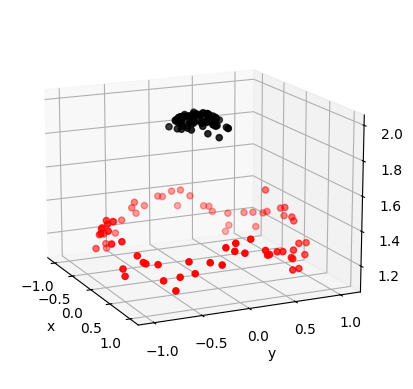

In [ ]:
# plot in 3d

axes = plt.subplot(projection='3d')
axes.scatter3D(X[:, 0], X[:, 1], z, c=y, cmap='flag')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_zlabel('z')

# rotate the axes and update
axes.view_init(15, -25)

plt.show()

## <span style="color:crimson">Classify using the Poly Kernel</span>

In [59]:
# train and predict using a poly kernel with degree 3
poly_clf = SVC(kernel='poly', degree=9)
poly_clf.fit(xtrain, ytrain)
ypred=poly_clf.predict(xtest)

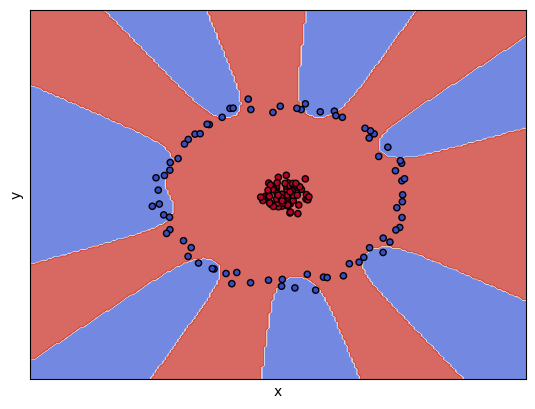

In [60]:
# using poly kernel
plot_decision_boundary(X,y,poly_clf)

In [ ]:
# train and predict using a poly kernel with degree 2
poly_clf = SVC(kernel='poly', degree=5)
poly_clf.fit(xtrain, ytrain)
ypred=poly_clf.predict(xtest)

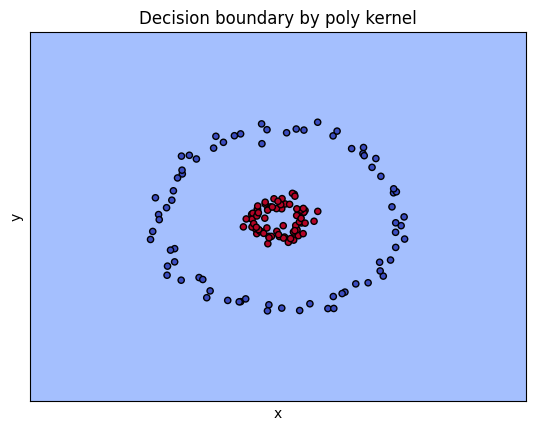

In [ ]:
# using poly kernel
plot_decision_boundary(X,y,poly_clf)

Using Grid-Search CV you can test different values for degree of the polynomial and find the optimal degree.

In [ ]:
# train and predict using a poly Kernel degree 2 classifier
poly_clf = SVC(kernel='poly', degree=2)
poly_clf.fit(xtrain, ytrain)
ypred=poly_clf.predict(xtest)


In [ ]:
# check model performance
from sklearn.metrics import accuracy_score
accuracy_score(ypred, ytest)

1.0

**We get an Accuracy of 100%**

In [ ]:
import numpy as np
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=100, factor=0.2, noise=0.05)

# Map to 3D
z = (X[:,0]**2 + X[:,1]**2).reshape(-1,1)
X_3d = np.hstack([X, z])

In [ ]:
X_3d

array([[ 1.90686177e-01,  1.01630912e+00,  1.06924545e+00],
       [ 1.73061558e-01,  2.51128080e-02,  3.05809559e-02],
       [-8.56788881e-02,  3.13159976e-01,  1.05410043e-01],
       [-9.35328027e-01,  3.93716286e-01,  1.02985103e+00],
       [ 6.67974230e-01, -6.90554913e-01,  9.23055661e-01],
       [ 1.92514484e-01,  1.34512548e-01,  5.51554522e-02],
       [ 7.35084777e-01,  6.69599681e-01,  9.88713363e-01],
       [-7.11506542e-01, -7.47022692e-01,  1.06428446e+00],
       [-6.01898121e-01,  7.20545621e-01,  8.81467339e-01],
       [-1.96534871e-01, -2.37193712e-01,  9.48868124e-02],
       [ 3.71465695e-02,  9.84720522e-01,  9.71054373e-01],
       [-2.46049396e-01,  2.19291650e-02,  6.10211934e-02],
       [ 2.11521516e-02,  2.18963438e-01,  4.83924006e-02],
       [-1.41438619e-02, -2.25927363e-01,  5.12432222e-02],
       [-1.02401980e+00,  6.56455727e-02,  1.05292589e+00],
       [ 2.06565625e-01, -1.56765921e-01,  6.72449112e-02],
       [ 2.93458953e-01, -7.05956145e-02